<a href="https://colab.research.google.com/github/mertbkts/Covid19-Prediction-From-LungCT/blob/main/Predict_Multiple_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

Importing Dependencies

In [2]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow import keras
import random, os
import matplotlib.pyplot as plt
from imutils import paths

Importing Model, Weight and The Folder that Contains Images We Want To Predict

In [3]:
model = keras.models.load_model(#' Please enter your model's path here')
model.load_weights(#' Please enter your weight's path here')

In [4]:
path = #' Please enter the path of the folder that contains images you want to predict'
imagePaths = list(paths.list_images(path))

Preprocessing

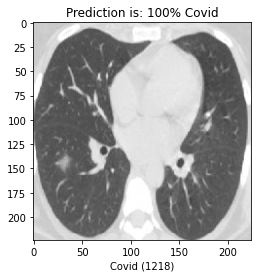

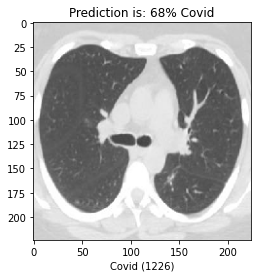

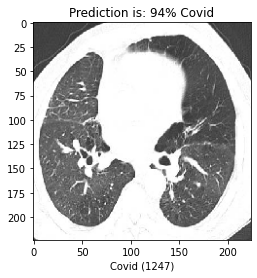

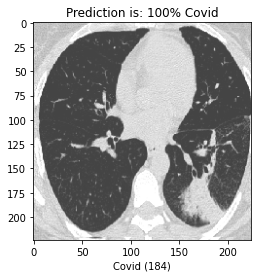

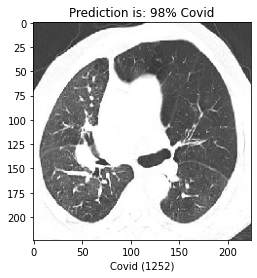

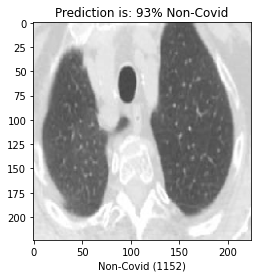

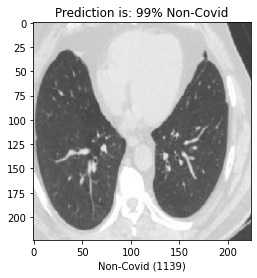

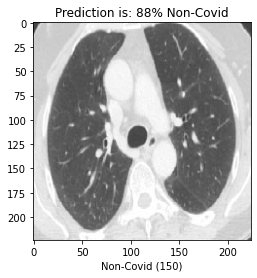

In [5]:
from pathlib import Path

for imagePath in imagePaths:
    # Read image, change color channel to RGB and resize the image to 224x224 pixels
    img = image.load_img(imagePath,color_mode='rgb', target_size=(224, 224))
    # Convert image to a array and normalize
    x = image.img_to_array(img) / 255.0
    # Expand the shape of the array to fit the model
    x = np.expand_dims(x, axis=0)

    # Prediction
    prediction = model.predict(x)
    
    # If the probability is lower than %50, it means the CT belongs to a person who is sick with covid
    probability=int((prediction[0][1])*100)
    if(probability>50):
      plt.title('Prediction is: %d' %probability + '% Non-Covid')
    else:
      plt.title('Prediction is: %d' %(100-probability) + '% Covid')

    # Show results  
    plt.imshow(img)
    plt.xlabel(Path(imagePath).stem)
    plt.show()